In [ ]:
total_municipalities = 19429
##checked it from google

In [1]:
from google.colab import files
#This is the code to upload the file to google colab. If use other platform, plz delete it.
uploaded = files.upload()

Saving Full Run.xlsx to Full Run.xlsx


In [2]:
import pandas as pd
fullrun = pd.read_excel("Full Run.xlsx")
fullrun

,Unnamed: 0,Answer,Question,Muni,Type,State,geoid
0,0,80,22,norwell,NaN,ma,166551
1,1,Yes,4,lacey,NaN,wa,114647
2,2,Yes,5,lacey,NaN,wa,114647
3,3,No,6,lacey,NaN,wa,114647
4,4,Yes,8,lacey,NaN,wa,114647
...,...,...,...,...,...,...,...
91259,91260,5000,27,trainer,Max,pa,209245
91260,91261,1400,27,upland,Max,pa,173940
91261,91262,30000,27,upper chichester,Max,pa,174436
91262,91263,20000,27,upper darby,Max,pa,174437


In [3]:
questions = list(set(fullrun["Question"]))
print(len(questions))
questions# to check the question list

14


[2, 4, 5, 6, 8, 9, 11, 13, 14, 17, 20, 21, 22, 27]

In [23]:
types = list(set(fullrun["Type"]))
types = types[0:1]+types[2:]
types#to saperate 27 into two question in the columns.

['Max', 'Min', 'Mean']

In [24]:
#adjust the format of our data
for i in questions:
  if i == questions[0]:
    edited_fullrun = fullrun[fullrun["Question"]==i]
    order = ["Unnamed: 0","Muni","State","geoid","Answer","Question"]
    edited_fullrun = edited_fullrun[order]
    edited_fullrun = edited_fullrun.rename({"Answer":"A2", "Question":"Q2"}, axis='columns')
    print(len(edited_fullrun))
  else:
    if i == 27:
      for j in types:
        question_filtered = fullrun[(fullrun["Question"]==i) & (fullrun["Type"]==j)]
        question_filtered = question_filtered[["Answer","Question","geoid"]]
        question_filtered = question_filtered.rename({"Answer":"A"+str(i)+j, "Question":"Q"+str(i)+j}, axis='columns')
        edited_fullrun = pd.merge(edited_fullrun, question_filtered, on ="geoid")
    else:
      question_filtered = fullrun[fullrun["Question"]==i]
      question_filtered = question_filtered[["Answer","Question","geoid"]]
      question_filtered = question_filtered.rename({"Answer":"A"+str(i), "Question":"Q"+str(i)}, axis='columns')
    ##For reading, I change Answer into A, and Question in to Q
      edited_fullrun = pd.merge(edited_fullrun, question_filtered, on ="geoid")
    print(len(question_filtered))
edited_fullrun.to_excel("edited_fullrun.xlsx")
edited_fullrun#This is the reshaped full_run

5704
5704
5704
5704
5704
5704
5704
5704
5704
5704
5704
5704
5704
5704


,Unnamed: 0,Muni,State,geoid,A2,Q2,A4,Q4,A5,Q5,...,A21,Q21,A22,Q22,A27Max,Q27Max,A27Min,Q27Min,A27Mean,Q27Mean
0,12,lacey,wa,114647,26,2,Yes,4,Yes,5,...,No,21,45,22,17424,27,0,27,4676.727273,27
1,25,pacific,wa,114626,10,2,Yes,4,No,5,...,No,21,60,22,43560,27,0,27,7445,27
2,38,yreka,ca,184469,13,2,No,4,No,5,...,No,21,70,22,43560,27,7000,27,11456,27
3,51,crescent city,ca,123100,19,2,Yes,4,No,5,...,No,21,100,22,21780,27,0,27,6315,27
4,64,arcata,ca,123103,19,2,No,4,Yes,5,...,Yes,21,30,22,6000,27,5000,27,5600,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,74099,trainer,pa,209245,6,2,Yes,4,No,5,...,No,21,NaN,22,5000,27,3000,27,4000,27
5700,74112,upland,pa,173940,5,2,Yes,4,No,5,...,Yes,21,65,22,1400,27,0,27,701.5,27
5701,74125,upper chichester,pa,174436,16,2,No,4,No,5,...,No,21,20,22,30000,27,1,27,7667,27
5702,74138,upper darby,pa,174437,14,2,Yes,4,Yes,5,...,No,21,60,22,20000,27,5000,27,11300,27


In [6]:
from google.colab import files
#This is the code to upload the file to google colab. If use other platform, plz delete it.
uploaded = files.upload()

Saving Wharton_data.xlsx to Wharton_data.xlsx


In [7]:
wharton = pd.read_excel("Wharton_data.xlsx")
wharton = wharton.rename({"cencus_id_pid6":"geoid"}, axis='columns')
#The updated fullrun;s cencus id pid6 is called geoid, so I used "geoid"
wharton
## The appendix says that they received 2825 questionnaires, but there are 2844 in the data

,Unnamed: 0,id,GEOID,statecode,statecode_str,state,countycode18,countyname18,fipsplacecode18,communityname18,...,alloc_q8f18,alloc_q9a18,alloc_q9b18,alloc_q9c18,missing_q3_a_f18,missing_q4_a_j18,missing_q4_k_t18,missing_q8_a_f18,missing_q9_a_c18,geoid
0,0,101260,2501365825,25,25,MA,13.0,Hampden County,65825,Southwick,...,0,0,0,0,0,0,0,0,0,166508.0
1,1,101403,2502701885,25,25,MA,27.0,Worcester County,1885,Ashburnham,...,1,0,0,0,0,0,0,0,0,208274.0
2,2,101641,2501702130,25,25,MA,17.0,Middlesex County,2130,Ashland,...,0,0,0,1,0,0,0,0,0,106129.0
3,3,101658,2502706365,25,25,MA,27.0,Worcester County,6365,Bolton,...,1,0,0,0,0,0,0,0,0,183906.0
4,4,101725,2501768050,25,25,MA,17.0,Middlesex County,68050,Stow,...,0,0,0,0,0,0,0,0,0,183901.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,2839,715611,1772052,17,17,IL,111.0,McHenry County,72052,Spring Grove,...,0,0,0,0,0,0,0,0,0,162480.0
2840,2840,715614,5578375,55,55,WI,133.0,Waukesha County,78375,Summit,...,0,0,0,0,0,0,0,0,0,224824.0
2841,2841,715618,1778227,17,17,IL,97.0,Lake County,78227,Volo,...,0,0,0,0,0,0,0,0,0,162433.0
2842,2842,715623,1782855,17,17,IL,111.0,McHenry County,82855,Wonder Lake,...,0,0,0,0,0,0,0,0,0,162486.0


In [8]:
#edited the format of wharton data(change the geoid from float into int.)
fips = list(wharton["geoid"])
for i in range(len(fips)):
  try:
    fips[i] = int(fips[i])
  except:
    print(fips[i])# find out that there's 6 data that does not have geoid from the cencus_of_gov
    fips[i] = "NaN"
wharton["geoid"] = fips
wharton

nan
nan
nan
nan
nan
nan


,Unnamed: 0,id,GEOID,statecode,statecode_str,state,countycode18,countyname18,fipsplacecode18,communityname18,...,alloc_q8f18,alloc_q9a18,alloc_q9b18,alloc_q9c18,missing_q3_a_f18,missing_q4_a_j18,missing_q4_k_t18,missing_q8_a_f18,missing_q9_a_c18,geoid
0,0,101260,2501365825,25,25,MA,13.0,Hampden County,65825,Southwick,...,0,0,0,0,0,0,0,0,0,166508
1,1,101403,2502701885,25,25,MA,27.0,Worcester County,1885,Ashburnham,...,1,0,0,0,0,0,0,0,0,208274
2,2,101641,2501702130,25,25,MA,17.0,Middlesex County,2130,Ashland,...,0,0,0,1,0,0,0,0,0,106129
3,3,101658,2502706365,25,25,MA,27.0,Worcester County,6365,Bolton,...,1,0,0,0,0,0,0,0,0,183906
4,4,101725,2501768050,25,25,MA,17.0,Middlesex County,68050,Stow,...,0,0,0,0,0,0,0,0,0,183901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,2839,715611,1772052,17,17,IL,111.0,McHenry County,72052,Spring Grove,...,0,0,0,0,0,0,0,0,0,162480
2840,2840,715614,5578375,55,55,WI,133.0,Waukesha County,78375,Summit,...,0,0,0,0,0,0,0,0,0,224824
2841,2841,715618,1778227,17,17,IL,97.0,Lake County,78227,Volo,...,0,0,0,0,0,0,0,0,0,162433
2842,2842,715623,1782855,17,17,IL,111.0,McHenry County,82855,Wonder Lake,...,0,0,0,0,0,0,0,0,0,162486


In [9]:
#how many "NaN" geoid in wharton data
count = 0
for i in wharton["geoid"]:
  if i =="NaN":
    print("nan")
  else:
    count+=1
count

nan
nan
nan
nan
nan
nan


2838

In [10]:
#6 county that does not have conses_id_pid6 in the census_of_gov.xlsx.
wharton[wharton["geoid"]=="NaN"]

,Unnamed: 0,id,GEOID,statecode,statecode_str,state,countycode18,countyname18,fipsplacecode18,communityname18,...,alloc_q8f18,alloc_q9a18,alloc_q9b18,alloc_q9c18,missing_q3_a_f18,missing_q4_a_j18,missing_q4_k_t18,missing_q8_a_f18,missing_q9_a_c18,geoid
44,44,107950,3460900,34,34,NJ,21.0,Mercer County,60915,Princeton,...,0,0,0,0,0,0,0,0,0,NaN
376,376,166982,UNINC,6,6,CA,45.0,Mendocino County,8530,Brooktrails (Csd),...,0,0,0,0,0,0,0,0,0,NaN
398,398,170133,02195,2,2,AK,NaN,Petersburg Census Area,60310,Petersburg,...,0,0,0,0,0,0,0,0,0,NaN
400,400,170261,2501501325,25,25,MA,15.0,Hampshire County,1325,Amherst,...,0,0,0,0,0,0,0,0,0,NaN
1936,1936,248886,3902374119,39,39,OH,23.0,NaN,73088,Springfield,...,0,0,0,0,0,0,0,0,0,NaN
2077,2077,434443,UNINC,32,32,NV,5.0,Douglas County,26300,Gardnerville,...,0,0,0,0,0,0,0,0,0,NaN


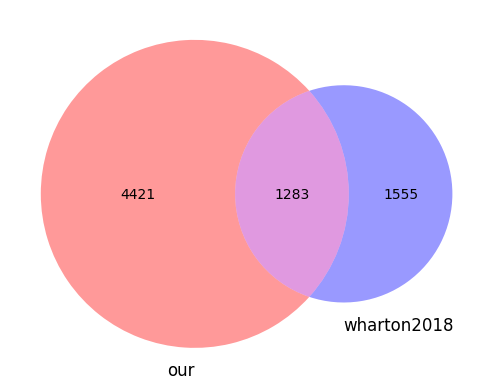

In [11]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
venn2(
    subsets = [set(edited_fullrun["geoid"]),set(wharton[wharton["geoid"]!="NaN"]["geoid"])],
    set_labels=('our','wharton2018'),
    set_colors=('r','b'))
plt.savefig("venn_of_dataset_comparation.png")
## There's 6 county that does not have conses_id_pid6 in the census_of_gov.xlsx. I kicked it out.

In [12]:
wharton.columns.values.tolist()
print(wharton.columns.values.tolist())

['Unnamed: 0', 'id', 'GEOID', 'statecode', 'statecode_str', 'state', 'countycode18', 'countyname18', 'fipsplacecode18', 'communityname18', 'metro18', 'cbsacode18', 'cbsatitle18', 'LPPI18', 'SPII18', 'CII18', 'LPAI18', 'LZAI18', 'LAI18', 'SRI18', 'DRI18', 'OSI18', 'EI18', 'AHI18', 'ADI18', 'WRLURI18', 'weight_full', 'weight_metro', 'weight_cbsa', 'totinitiatives18', 'appr_rate18', 'q118', 'q218', 'q3a18', 'q3b18', 'q3c18', 'q3d18', 'q3e18', 'q3f18', 'q3a_other18', 'q4_1a18', 'q4_1b18', 'q4_1c18', 'q4_1d18', 'q4_1e18', 'q4_1f18', 'q4_1g18', 'q4_1h18', 'q4_1i18', 'q4_1j18', 'q4a_other18', 'q4_2k18', 'q4_2l18', 'q4_2m18', 'q4_2n18', 'q4_2o18', 'q4_2p18', 'q4_2q18', 'q4_2r18', 'q4_2s18', 'q4_2t18', 'q4b_other18', 'q5a18', 'q5b18', 'q5a_m5018', 'q5b_multi18', 'q618', 'q718', 'q7a18', 'q7b18', 'q8a18', 'q8b18', 'q8c18', 'q8d18', 'q8e18', 'q8f18', 'q9a18', 'q9b18', 'q9c18', 'q1018', 'q11a18', 'q11b18', 'q11c18', 'q11d18', 'q12a_subm18', 'q12a_appr18', 'q12b_subm18', 'q12b_appr18', 'q1318', 'q1

In [26]:
correlation_df = pd.merge(edited_fullrun, wharton[["geoid","WRLURI18", 'q118', 'q218', 'q3a18', 'q3b18', 'q3c18', 'q3d18', 'q3e18', 'q3f18', 'q3a_other18', 'q4_1a18', 'q4_1b18', 'q4_1c18', 'q4_1d18', 'q4_1e18', 'q4_1f18', 'q4_1g18', 'q4_1h18', 'q4_1i18', 'q4_1j18', 'q4a_other18', 'q4_2k18', 'q4_2l18', 'q4_2m18', 'q4_2n18', 'q4_2o18', 'q4_2p18', 'q4_2q18', 'q4_2r18', 'q4_2s18', 'q4_2t18', 'q4b_other18', 'q5a18', 'q5b18', 'q5a_m5018', 'q5b_multi18', 'q618', 'q718', 'q7a18', 'q7b18', 'q8a18', 'q8b18', 'q8c18', 'q8d18', 'q8e18', 'q8f18', 'q9a18', 'q9b18', 'q9c18', 'q1018', 'q11a18', 'q11b18', 'q11c18', 'q11d18', 'q12a_subm18', 'q12a_appr18', 'q12b_subm18', 'q12b_appr18', 'q1318', 'q14a18', 'q14b18', 'q1518', 'q16a118', 'q16b118', 'q16a218', 'q16b218', 'q17a118', 'q17a218', 'q17b118', 'q17b218', 'q18a18', 'q18b18', 'q1918', 'q19_rezoning18', 'q20a18', 'q20b18', 'q20c18', 'q2118', 'q21_subdivision18', 'q22a18', 'q22b18', 'q22c18']], on = "geoid")
correlation_df.replace({'Yes': 1, 'No': 0}, inplace=True) #exchange yes and no to 1/0
correlation_df


,Unnamed: 0,Muni,State,geoid,A2,Q2,A4,Q4,A5,Q5,...,q1918,q19_rezoning18,q20a18,q20b18,q20c18,q2118,q21_subdivision18,q22a18,q22b18,q22c18
0,64,arcata,ca,123103,19.0,2,0.0,4,1.0,5,...,1.0,1,9.5,18.0,18.0,NaN,1,9.5,18.0,9.5
1,220,east vincent,pa,174338,10.0,2,1.0,4,0.0,5,...,1.0,1,30.0,30.0,30.0,1.0,1,30.0,30.0,30.0
2,259,west brandywine,pa,174349,13.0,2,0.0,4,0.0,5,...,1.0,1,9.5,9.5,9.5,1.0,1,1.5,1.5,1.5
3,285,west goshen,pa,209334,24.0,2,0.0,4,1.0,5,...,1.0,1,1.5,4.5,4.5,1.0,1,4.5,9.5,9.5
4,376,east norriton,pa,209398,18.0,2,0.0,4,0.0,5,...,1.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,74021,cheltenham,pa,191390,15.0,2,1.0,4,0.0,5,...,NaN,1,30.0,30.0,30.0,NaN,1,18.0,18.0,18.0
1279,74034,collegeville,pa,174057,12.0,2,1.0,4,1.0,5,...,1.0,1,9.5,9.5,9.5,1.0,1,9.5,9.5,9.5
1280,74060,swarthmore,pa,133541,9.0,2,1.0,4,1.0,5,...,2.0,0,4.5,4.5,4.5,1.0,1,4.5,4.5,4.5
1281,74125,upper chichester,pa,174436,16.0,2,0.0,4,0.0,5,...,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [40]:
correlation_df.to_excel("edited_full_run_with_wharton_index_2018.xlsx")

In [39]:
correlation_df.columns.values.tolist()
print(correlation_df.columns.values.tolist())

['Unnamed: 0', 'Muni', 'State', 'geoid', 'A2', 'Q2', 'A4', 'Q4', 'A5', 'Q5', 'A6', 'Q6', 'A8', 'Q8', 'A9', 'Q9', 'A11', 'Q11', 'A13', 'Q13', 'A14', 'Q14', 'A17', 'Q17', 'A20', 'Q20', 'A21', 'Q21', 'A22', 'Q22', 'A27Max', 'Q27Max', 'A27Min', 'Q27Min', 'A27Mean', 'Q27Mean', 'WRLURI18', 'q118', 'q218', 'q3a18', 'q3b18', 'q3c18', 'q3d18', 'q3e18', 'q3f18', 'q3a_other18', 'q4_1a18', 'q4_1b18', 'q4_1c18', 'q4_1d18', 'q4_1e18', 'q4_1f18', 'q4_1g18', 'q4_1h18', 'q4_1i18', 'q4_1j18', 'q4a_other18', 'q4_2k18', 'q4_2l18', 'q4_2m18', 'q4_2n18', 'q4_2o18', 'q4_2p18', 'q4_2q18', 'q4_2r18', 'q4_2s18', 'q4_2t18', 'q4b_other18', 'q5a18', 'q5b18', 'q5a_m5018', 'q5b_multi18', 'q618', 'q718', 'q7a18', 'q7b18', 'q8a18', 'q8b18', 'q8c18', 'q8d18', 'q8e18', 'q8f18', 'q9a18', 'q9b18', 'q9c18', 'q1018', 'q11a18', 'q11b18', 'q11c18', 'q11d18', 'q12a_subm18', 'q12a_appr18', 'q12b_subm18', 'q12b_appr18', 'q1318', 'q14a18', 'q14b18', 'q1518', 'q16a118', 'q16b118', 'q16a218', 'q16b218', 'q17a118', 'q17a218', 'q17b1

I used Pearson mathod to calculate the correlation.

In [28]:
correlation = pd.DataFrame()
pearson = correlation_df[[ 'A2', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A13', 'A14', 'A17', 'A20','A21', 'A22', 'A27Min', 'A27Mean', "A27Max",  'WRLURI18']].corr(method = "pearson").abs()["WRLURI18"]
correlation["pearson"] = pearson
correlation.to_excel("correlation_to_Wharton_index.xlsx")
correlation##correlation to the index

,pearson
A2,0.135640
A4,0.007136
A5,0.057744
A6,0.032267
A8,0.064995
A9,0.168931
A11,0.123032
A13,0.031148
A14,0.030705
A17,0.324324


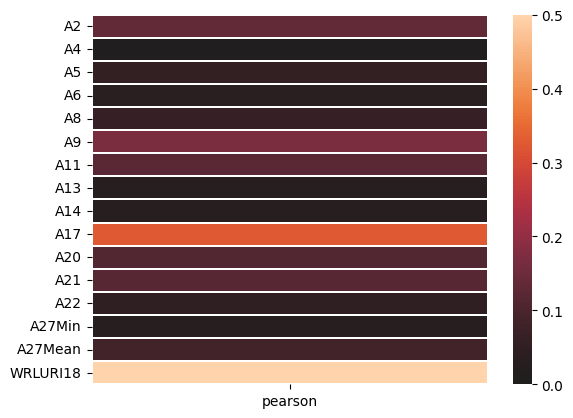

In [ ]:
import seaborn as sns
sns.heatmap(correlation, vmax=0.5, vmin=0,linewidths=0.05,  center=0)
plt.savefig('correlation_toindex.png')

In [29]:
qtoq = correlation_df[[ 'A2', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A13', 'A14', 'A17', 'A20','A21', 'A22', 'A27Min', 'A27Mean', "A27Max",
                'q118', 'q218', 'q3a18', 'q3b18', 'q3c18', 'q3d18', 'q3e18', 'q3f18', 'q3a_other18', 'q4_1a18', 'q4_1b18', 'q4_1c18', 'q4_1d18', 'q4_1e18', 'q4_1f18', 'q4_1g18', 'q4_1h18', 'q4_1i18', 'q4_1j18', 'q4a_other18', 'q4_2k18', 'q4_2l18', 'q4_2m18', 'q4_2n18', 'q4_2o18', 'q4_2p18', 'q4_2q18', 'q4_2r18', 'q4_2s18', 'q4_2t18', 'q4b_other18', 'q5a18', 'q5b18', 'q5a_m5018', 'q5b_multi18', 'q618', 'q718', 'q7a18', 'q7b18', 'q8a18', 'q8b18', 'q8c18', 'q8d18', 'q8e18', 'q8f18', 'q9a18', 'q9b18', 'q9c18', 'q1018', 'q11a18', 'q11b18', 'q11c18', 'q11d18', 'q12a_subm18', 'q12a_appr18', 'q12b_subm18', 'q12b_appr18', 'q1318', 'q14a18', 'q14b18', 'q1518', 'q16a118', 'q16b118', 'q16a218', 'q16b218', 'q17a118', 'q17a218', 'q17b118', 'q17b218', 'q18a18', 'q18b18', 'q1918', 'q19_rezoning18', 'q20a18', 'q20b18', 'q20c18', 'q2118', 'q21_subdivision18', 'q22a18', 'q22b18', 'q22c18']].corr(method = "pearson").abs()
correlation_qtoq = qtoq[[ 'A2', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A13', 'A14', 'A17', 'A20','A21', 'A22', 'A27Min', 'A27Mean',"A27Max"]]
correlation_qtoq = correlation_qtoq.iloc[16:]
correlation_qtoq.to_excel("correlation_question_to_question.xlsx")
correlation_qtoq## correlation question to question.

<ipython-input-29-402b0c354051>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  qtoq = correlation_df[[ 'A2', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A13', 'A14', 'A17', 'A20','A21', 'A22', 'A27Min', 'A27Mean', "A27Max",


,A2,A4,A5,A6,A8,A9,A11,A13,A14,A17,A20,A21,A22,A27Min,A27Mean,A27Max
q218,0.095483,0.011506,0.057918,0.130783,0.021942,0.158122,0.073834,0.000888,0.029319,0.107502,0.013641,0.060356,0.025063,0.089244,0.096655,0.040410
q3a18,0.062367,0.055038,0.065240,0.021956,0.062053,0.050748,0.040060,0.010236,0.027591,0.092093,0.010088,0.070003,0.017554,0.004381,0.026493,0.044572
q3b18,0.101400,0.003955,0.059296,0.004288,0.055782,0.052945,0.106304,0.006067,0.032942,0.188125,0.082527,0.054354,0.032032,0.007543,0.065749,0.069759
q3c18,0.118340,0.000869,0.016099,0.027185,0.014654,0.077662,0.085590,0.005933,0.060131,0.126790,0.046428,0.050412,0.014405,0.040757,0.032928,0.034441
q3d18,0.075461,0.057881,0.019472,0.057874,0.047564,0.066095,0.056810,0.002914,0.011541,0.080616,0.067457,0.067347,0.007753,0.010483,0.013910,0.005340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q2118,0.098375,0.023662,0.024026,0.011517,0.018105,0.031857,0.067053,0.044171,0.056949,0.037784,0.070324,0.038459,0.015408,0.033571,0.025464,0.013164
q21_subdivision18,0.089572,0.030938,0.005929,0.005194,0.019025,0.013716,0.037590,0.055333,0.084561,0.026676,0.036884,0.049274,0.016603,0.028899,0.030277,0.016131
q22a18,0.066900,0.025458,0.040878,0.081950,0.022857,0.123481,0.102980,0.070882,0.029774,0.237851,0.058502,0.099324,0.045596,0.014323,0.061418,0.006002
q22b18,0.056862,0.005895,0.065560,0.070380,0.015612,0.137674,0.083451,0.072372,0.027873,0.263942,0.078976,0.088595,0.029840,0.030830,0.076225,0.022967


In [30]:
correlation_qtoq.index

Index(['q218', 'q3a18', 'q3b18', 'q3c18', 'q3d18', 'q3e18', 'q3f18', 'q4_1a18',
       'q4_1b18', 'q4_1c18', 'q4_1d18', 'q4_1e18', 'q4_1f18', 'q4_1g18',
       'q4_1h18', 'q4_1i18', 'q4_1j18', 'q4_2k18', 'q4_2l18', 'q4_2m18',
       'q4_2n18', 'q4_2o18', 'q4_2p18', 'q4_2q18', 'q4_2r18', 'q4_2s18',
       'q4_2t18', 'q5a18', 'q5b18', 'q5a_m5018', 'q5b_multi18', 'q618', 'q718',
       'q7a18', 'q7b18', 'q8a18', 'q8b18', 'q8c18', 'q8d18', 'q8e18', 'q8f18',
       'q9a18', 'q9b18', 'q9c18', 'q1018', 'q11a18', 'q11b18', 'q11c18',
       'q11d18', 'q12a_subm18', 'q12a_appr18', 'q12b_subm18', 'q12b_appr18',
       'q1318', 'q14a18', 'q14b18', 'q1518', 'q16a118', 'q16b118', 'q16a218',
       'q16b218', 'q17a118', 'q17a218', 'q17b118', 'q17b218', 'q18a18',
       'q18b18', 'q1918', 'q19_rezoning18', 'q20a18', 'q20b18', 'q20c18',
       'q2118', 'q21_subdivision18', 'q22a18', 'q22b18', 'q22c18'],
      dtype='object')

In [31]:
is_larger_than_05 = (correlation_qtoq > 0.3).any().any()
is_larger_than_05

True

In [32]:
for i in correlation_qtoq.columns.values.tolist():
  for j in correlation_qtoq.index.tolist():
    if correlation_qtoq.at[j,i] > 0.3 or correlation_qtoq.at[j,i] < -0.3:
      print(i,j)
# Only this two group has correlation

A17 q9a18
A17 q20c18


'\nThe white part appears because in the Wharton2018 data.\nThe amount of data for this question is too low, and all are null values.\n'

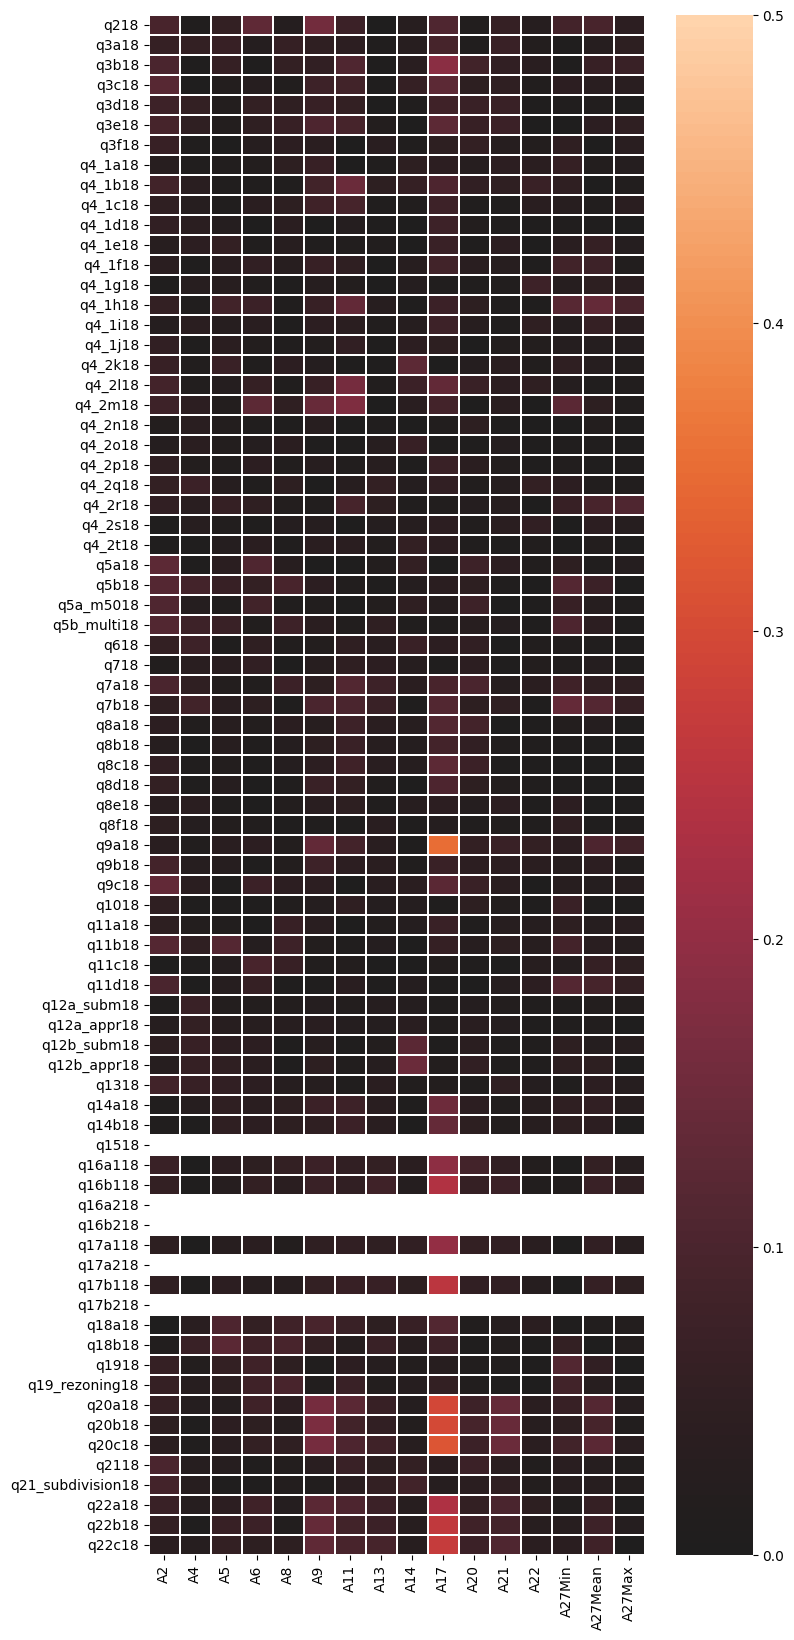

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 20))
sns.heatmap(correlation_qtoq, vmax=0.5, linewidths=0.05, vmin=0, center=0)
plt.savefig('correlation_qtoq.png')
"""
The white part appears because in the Wharton2018 data.
The amount of data for this question is too low, and all are null values.
"""

In [ ]:
len(correlation_qtoq)

77

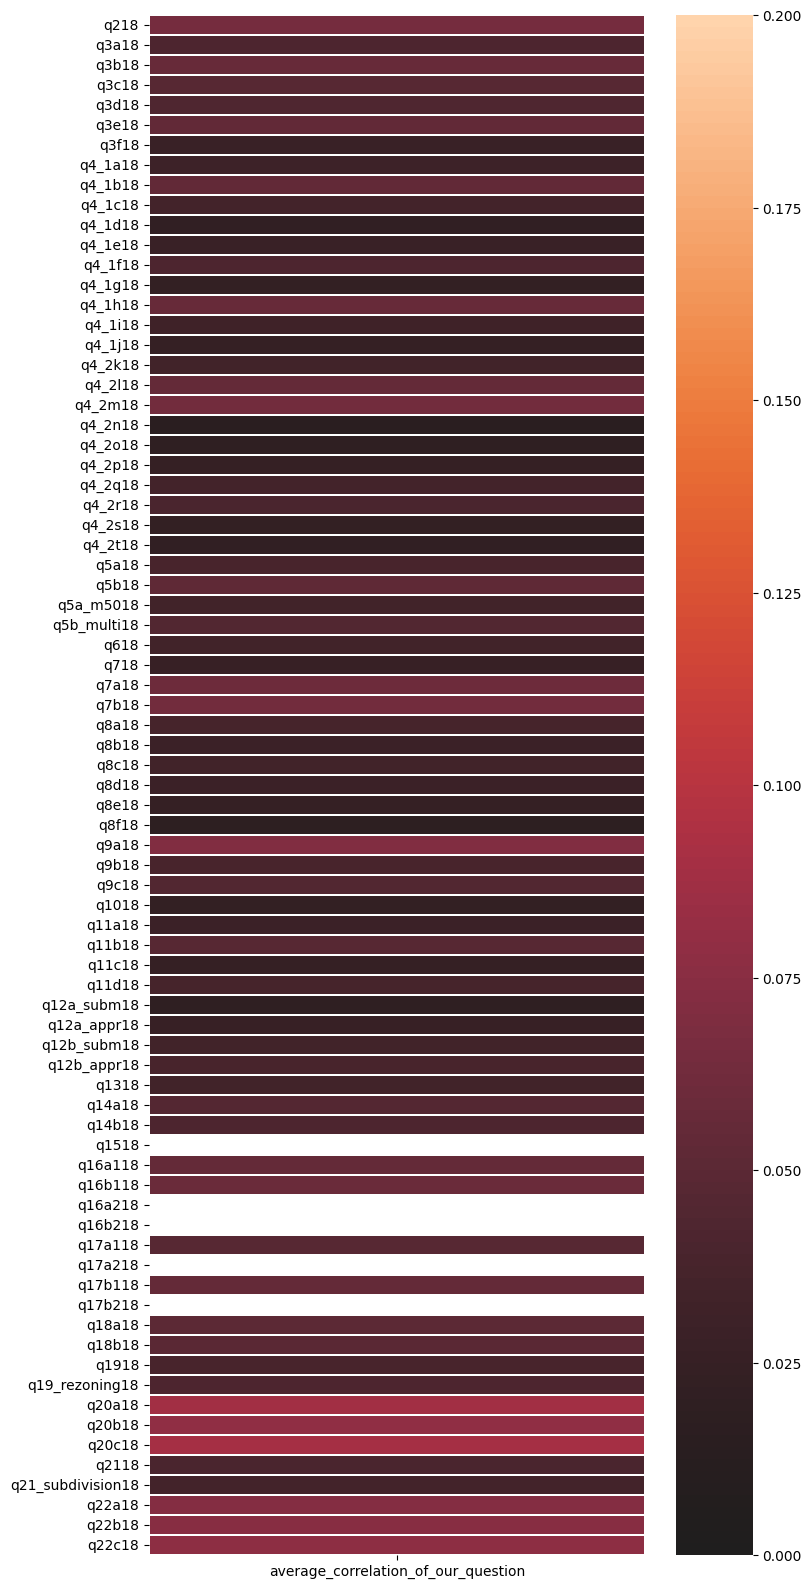

In [ ]:
ave_row = []
for i in range(len(correlation_qtoq)):
  row = correlation_qtoq.iloc[i].tolist()
  ave_row.append(sum(row)/len(row))
ave_row_corr = pd.DataFrame()
ave_row_corr["average_correlation_of_our_question"] = ave_row
name = ['q218', 'q3a18', 'q3b18', 'q3c18', 'q3d18', 'q3e18', 'q3f18', 'q4_1a18',
       'q4_1b18', 'q4_1c18', 'q4_1d18', 'q4_1e18', 'q4_1f18', 'q4_1g18',
       'q4_1h18', 'q4_1i18', 'q4_1j18', 'q4_2k18', 'q4_2l18', 'q4_2m18',
       'q4_2n18', 'q4_2o18', 'q4_2p18', 'q4_2q18', 'q4_2r18', 'q4_2s18',
       'q4_2t18', 'q5a18', 'q5b18', 'q5a_m5018', 'q5b_multi18', 'q618', 'q718',
       'q7a18', 'q7b18', 'q8a18', 'q8b18', 'q8c18', 'q8d18', 'q8e18', 'q8f18',
       'q9a18', 'q9b18', 'q9c18', 'q1018', 'q11a18', 'q11b18', 'q11c18',
       'q11d18', 'q12a_subm18', 'q12a_appr18', 'q12b_subm18', 'q12b_appr18',
       'q1318', 'q14a18', 'q14b18', 'q1518', 'q16a118', 'q16b118', 'q16a218',
       'q16b218', 'q17a118', 'q17a218', 'q17b118', 'q17b218', 'q18a18',
       'q18b18', 'q1918', 'q19_rezoning18', 'q20a18', 'q20b18', 'q20c18',
       'q2118', 'q21_subdivision18', 'q22a18', 'q22b18', 'q22c18']
ave_row_corr.index = name
import seaborn as sns
plt.figure(figsize=(8, 20))
sns.heatmap(ave_row_corr, vmax=0.2, vmin=0,linewidths=0.05,  center=0)
plt.savefig('average_correlation_of_our_question.png')

In [ ]:
print(list(reversed(sorted(ave_row_corr["ave"]))))

[0.0894833464152708, 0.08807999240579183, 0.07878192136930814, 0.07754408072882049, 0.07360576737894435, 0.07214495912310204, nan, nan, nan, nan, nan, 0.07176764829486143, 0.06481705543117687, 0.06390823600601354, 0.0632986164148471, 0.06017105063802819, 0.05795189809588527, 0.05691717577890085, 0.056887227979597194, 0.056214745933628775, 0.05520681329260099, 0.055178725352572164, 0.053959696396260255, 0.053265167372593354, 0.05186192007126613, 0.05068935995853553, 0.048641873290021856, 0.0483988390808676, 0.04787886294233976, 0.04719640865739346, 0.04574716921080114, 0.0451244512258986, 0.044655710567798636, 0.04287853448028338, 0.04132153145207883, 0.04119083466395178, 0.04115538971992817, 0.041060112489499506, 0.03989666310289735, 0.03978172653371322, 0.03896701022763557, 0.03887446264252624, 0.03876584254676178, 0.03809814669768959, 0.03690147884565247, 0.03597658269569421, 0.03548538961606756, 0.03536475635323352, 0.03473101722327088, 0.034121839780325715, 0.034092645630390855, 0.

In [ ]:
ave_row_corr[ave_row_corr["ave"]>0.07]#average correlation is higher than 0.07

,ave
q9a18,0.071768
q20a18,0.088080
q20b18,0.078782
q20c18,0.089483
q22a18,0.072145
q22b18,0.073606
q22c18,0.077544


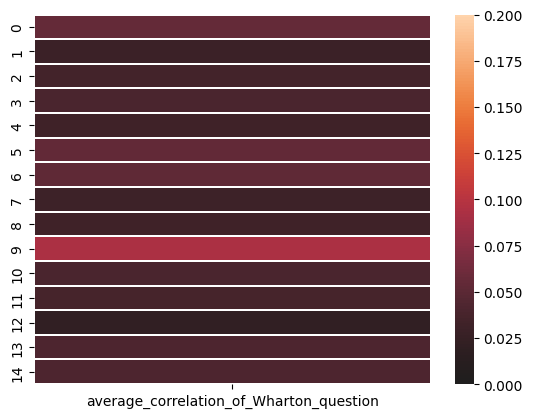

In [ ]:
column_name = correlation_qtoq.columns.values.tolist()
ave_column = []
for i in column_name:
  column = list(correlation_qtoq[i])
  column = [x for x in column if not pd.isna(x)]
  ave_column.append(sum(column)/len(column))
ave_column_corr = pd.DataFrame()
ave_column_corr["average_correlation_of_Wharton_question"] = ave_column
import seaborn as sns
sns.heatmap(ave_column_corr, vmax=0.2, vmin=0,linewidths=0.05,  center=0)
plt.savefig('average_correlation_of_Wharton_question.png')

In [ ]:
ave_column_corr

,ave
0,0.055848
1,0.028417
2,0.034890
3,0.039410
4,0.032722
5,0.053577
6,0.052851
7,0.030654
8,0.031639
9,0.092669


**The followed question is the question from Wharton 2018 that has average correlation coefficient above 0.07 with ours 15 questions.**

**And 9a and 20c has a higher than 0.3 correlation with our Q 17** : Does the zoning bylaw/ordinance include any mandates or incentives for development of affordable units?

**9a**:Include affordable housing, however defined, in their projects(Y/N)

**20**:What is the typical amount of time between application for rezoning and issuance of a building permit for development of:

a. Less than 50 single-family units

b. 50 or more single-family units

c. Multi-family units

Choice: (
  We do NOT have this unit/
  Less than 3 months/
  3 to 6 months/
  7 to 12 months/
  1 to 2 years/
  2 to 3 years/
  Over 3 years )

**22**:What is the typical amount of time between application for subdivision approval and issuance of a building permit for development of:

a. Less than 50 single-family units

b. 50 or more single-family units

Choise:(We do NOT
have this unit/
Less than
3 months/
3 to 6
months/
7 to 12
months/
1 to 2
years/
2 to 3
years/
Over 3
years)

**Our Q9 has the highest average correlation coefficient with Wharton Questions. Q9:** Does zoning include any provisions for housing that is restricted by age?

**Q9 is the only one above 0.07**

In [36]:
MaxMin = correlation_df[["geoid","A27Max", "q7b18"]]
ours = MaxMin["A27Max"]
for i in range(len(ours)):
  if ours[i] == "NaN" or ours[i] == 0:
    ours[i] = None
  elif ours[i]<=10:
    ours[i] = ours[i]* 43560
for i in range(len(ours)):
  if ours[i] == None:
    ours[i] = None
  elif ours[i] < 1/2* 43560:
    ours[i] = 1
  elif ours[i] < 1* 43560:
    ours[i] = 2
  elif ours[i] < 2* 43560:
    ours[i] = 3
  elif ours[i] >= 2* 43560:
    ours[i] = 4


MaxMin["A27Max"] = ours
MaxMin = MaxMin.dropna()
MaxMin.to_excel("maxmin.xlsx")
MaxMin

<ipython-input-36-fe3540ed8de3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ours[i] = ours[i]* 43560
<ipython-input-36-fe3540ed8de3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ours[i] = None
<ipython-input-36-fe3540ed8de3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ours[i] = 1
<ipython-input-36-fe3540ed8de3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,geoid,A27Max,q7b18
0,123103,1.0,1.0
1,174338,3.0,4.0
2,174349,4.0,3.0
3,209334,2.0,2.0
6,174279,4.0,3.0
...,...,...,...
1276,174287,3.0,4.0
1277,112017,1.0,2.0
1279,174057,1.0,4.0
1280,133541,1.0,1.0


In [38]:
diff = MaxMin[MaxMin["A27Max"]!=MaxMin["q7b18"]]
diff.to_excel("maxmin_diff.xlsx")

In [ ]:
MaxMin.corr()

,A27Max,q7b18
A27Max,1.000000,0.323294
q7b18,0.323294,1.000000
